# EDA exploring shapes and distributions mnist_train.csv and mnist_test. as datasets

Train dataset shape: (60000, 785)
Train class distribution:
 label
1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: count, dtype: int64

Test dataset shape: (10000, 785)
Test class distribution:
 label
1    1135
2    1032
7    1028
3    1010
9    1009
4     982
0     980
8     974
6     958
5     892
Name: count, dtype: int64


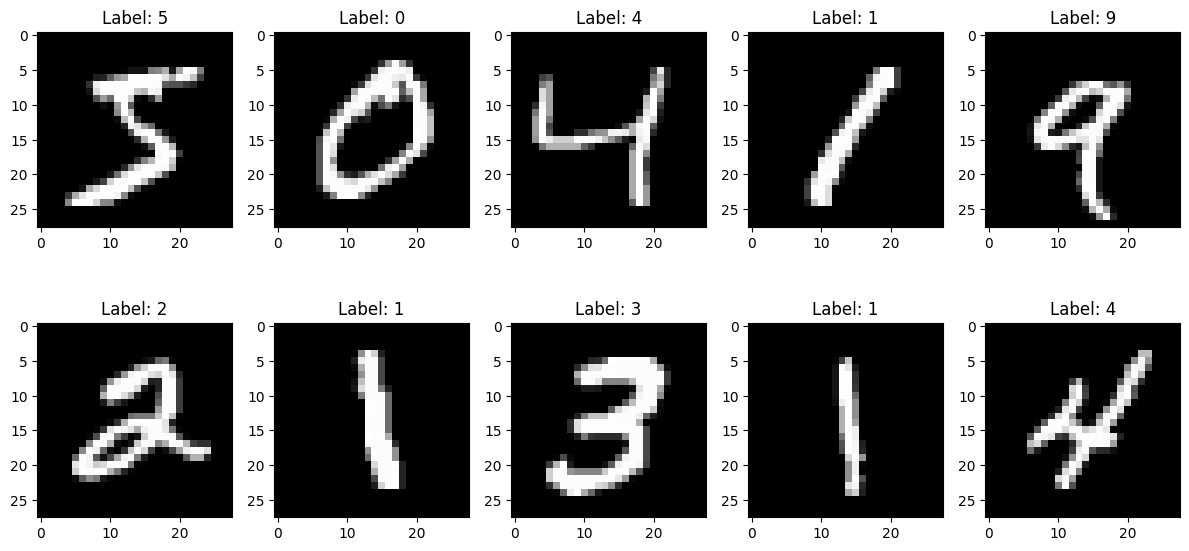

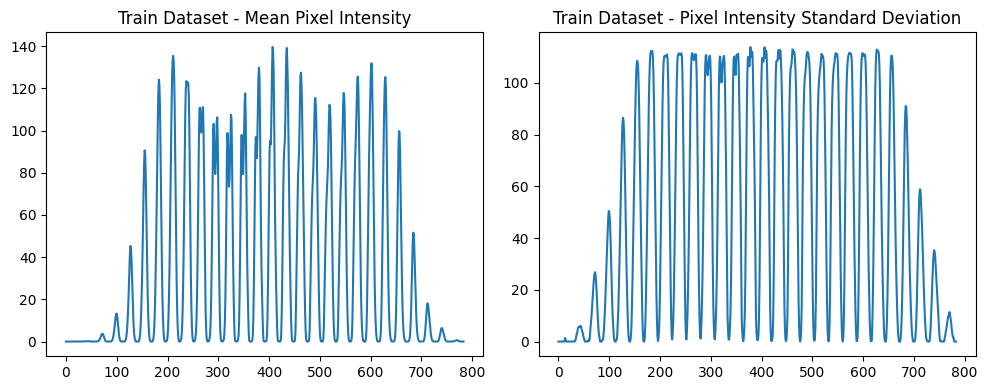

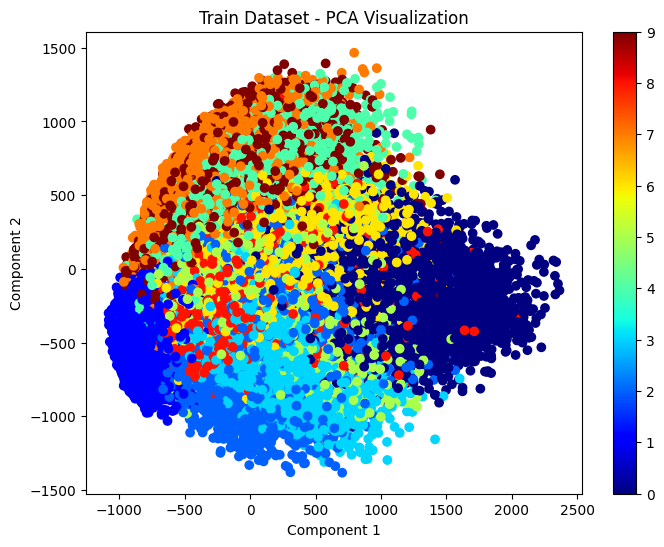

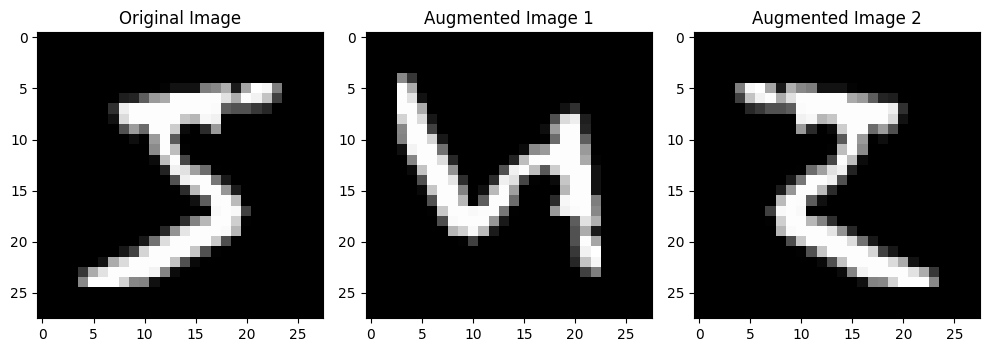

In [4]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import matplotlib.patches as patches  
import seaborn as sns
from sklearn.model_selection import cross_validate, cross_val_predict
from sklearn.linear_model import SGDClassifier
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import fetch_openml 
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score


# Loading MNIST train and test datasets
train_data = pd.read_csv('mnist_train.csv')
test_data = pd.read_csv('mnist_test.csv')

# Explore the train and test dataset
print("Train dataset shape:", train_data.shape)
print("Train class distribution:\n", train_data['label'].value_counts())
print("\nTest dataset shape:", test_data.shape)
print("Test class distribution:\n", test_data['label'].value_counts())

# Visualize sample images from the train dataset
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i, ax in enumerate(axes.flatten()):
    image = train_data.iloc[i, 1:].values.reshape(28, 28)
    ax.imshow(image, cmap='gray')
    ax.set_title("Label: {}".format(train_data.iloc[i, 0]))
plt.tight_layout()
plt.show()

# Pixel intensity analysis
train_pixel_values = train_data.iloc[:, 1:].values
train_pixel_mean = np.mean(train_pixel_values, axis=0)
train_pixel_std = np.std(train_pixel_values, axis=0)

plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.plot(train_pixel_mean)
plt.title("Train Dataset - Mean Pixel Intensity")

plt.subplot(122)
plt.plot(train_pixel_std)
plt.title("Train Dataset - Pixel Intensity Standard Deviation")
plt.tight_layout()
plt.show()

pca = PCA(n_components=2)
pca_result = pca.fit_transform(train_pixel_values)

plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=train_data['label'], cmap='jet')
plt.colorbar()
plt.title("Train Dataset - PCA Visualization")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()


image = train_data.iloc[0, 1:].values.reshape(28, 28) 
augmented_images = []

# Rotate the image
import cv2 as cv
rotated_image = cv.rotate(image, cv.ROTATE_90_CLOCKWISE)
augmented_images.append(rotated_image)

# Flip the image horizontally
flipped_image = cv.flip(image, 1)
augmented_images.append(flipped_image)

# Display the original and augmented images
fig, axes = plt.subplots(1, 3, figsize=(10, 4))
axes[0].imshow(image, cmap='gray')
axes[0].set_title("Original Image")

for i in range(2):
     axes[i+1].imshow(augmented_images[i], cmap='gray')
     axes[i+1].set_title("Augmented Image {}".format(i+1))

plt.tight_layout()
plt.show()





# Number of classes reduced to 5
### the collection of unique labels in the train dataset (set(train_labels)) is a subset of the set of unique labels in the test dataset (set(test_labels)), according to the assert statement.

Train dataset shape: (29772, 785)
Train class distribution:
 label
3    6131
2    5958
0    5923
6    5918
4    5842
Name: count, dtype: int64

Test dataset shape: (4962, 785)
Test class distribution:
 label
2    1032
3    1010
4     982
0     980
6     958
Name: count, dtype: int64


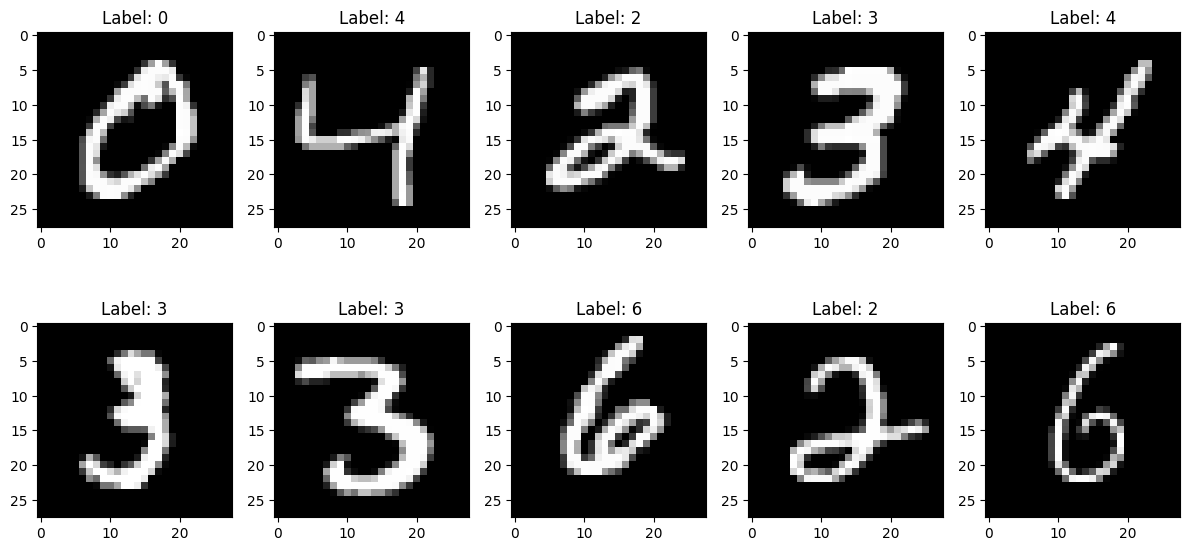

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the MNIST train and test datasets
train_data = pd.read_csv('mnist_train.csv')
test_data = pd.read_csv('mnist_test.csv')

# Reduce the number of classes to 5
selected_classes = np.random.choice(range(10), size=5, replace=False)
train_data = train_data[train_data['label'].isin(selected_classes)]
test_data = test_data[test_data['label'].isin(selected_classes)]

# Validate the alignment of target labels and data features
train_labels = train_data['label'].values
test_labels = test_data['label'].values

assert set(train_labels) <= set(test_labels) or set(test_labels) <= set(train_labels), "Target labels and data features are not aligned."

# Explore the train dataset
print("Train dataset shape:", train_data.shape)
print("Train class distribution:\n", train_data['label'].value_counts())

# Explore the test dataset
print("\nTest dataset shape:", test_data.shape)
print("Test class distribution:\n", test_data['label'].value_counts())

# Visualize sample images from the train dataset
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i, ax in enumerate(axes.flatten()):
    image = train_data.iloc[i, 1:].values.reshape(28, 28)
    ax.imshow(image, cmap='gray')
    ax.set_title("Label: {}".format(train_data.iloc[i, 0]))

plt.tight_layout()
plt.show()

# split the dataset to train-validation-test 
### The train, validation, and test sets' shapes and class distributions are printed by the code. A portion of the train dataset's sample photos are also displayed.

Train dataset shape: (18738, 785)
Train class distribution:
 label
3    3964
2    3785
8    3736
6    3720
5    3533
Name: count, dtype: int64

Validation dataset shape: (4685, 785)
Validation class distribution:
 label
2    980
3    973
6    958
8    949
5    825
Name: count, dtype: int64

Test dataset shape: (5856, 785)
Test class distribution:
 label
6    1240
3    1194
2    1193
8    1166
5    1063
Name: count, dtype: int64


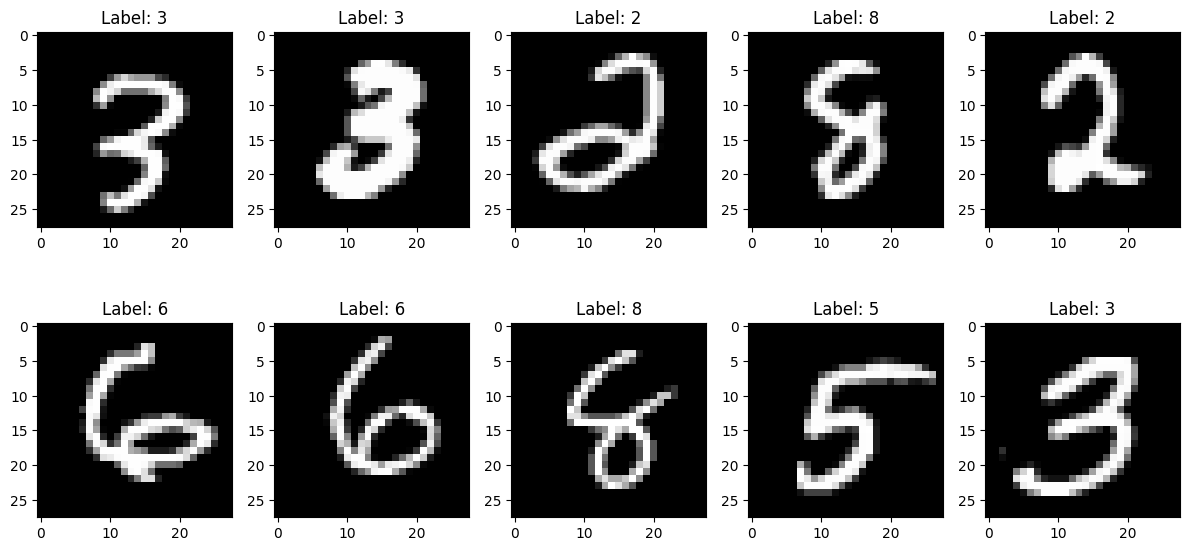

In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


train_data = pd.read_csv('mnist_train.csv')
test_data = pd.read_csv('mnist_test.csv')

# Reduce the number of classes to 5
selected_classes = np.random.choice(range(10), size=5, replace=False)
train_data = train_data[train_data['label'].isin(selected_classes)]
test_data = test_data[test_data['label'].isin(selected_classes)]

# Split the dataset into train, validation, and test sets
train_data, test_data = train_test_split(train_data, test_size=0.2, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.2, random_state=42)

# Explore the train, validation, and test datasets
print("Train dataset shape:", train_data.shape)
print("Train class distribution:\n", train_data['label'].value_counts())

print("\nValidation dataset shape:", val_data.shape)
print("Validation class distribution:\n", val_data['label'].value_counts())

print("\nTest dataset shape:", test_data.shape)
print("Test class distribution:\n", test_data['label'].value_counts())

# Visualize sample images from the train dataset
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
for i, ax in enumerate(axes.flatten()):
    image = train_data.iloc[i, 1:].values.reshape(28, 28)
    ax.imshow(image, cmap='gray')
    ax.set_title("Label: {}".format(train_data.iloc[i, 0]))

plt.tight_layout()
plt.show()

# [Kaggle notebook reference]('https://www.kaggle.com/datasets/dileep070/heart-disease-prediction-using-logistic-regression') using HistGradientBoostingClassifier instead of logisitic-regression so the model can handle missing values encoded as NaN natively
### evaluation showing accuracy,confusion matrix,precision,recall and F1 score

In [7]:
import pandas as pd
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


framingham_data = pd.read_csv('framingham.csv')

# Preprocess the data (e.g., handle missing values, encode categorical variables),Select features and target variable
X = framingham_data.drop('TenYearCHD', axis=1)
y = framingham_data['TenYearCHD']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create and fit the logistic regression model
model = HistGradientBoostingClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate and print the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)


Accuracy: 0.839622641509434
Confusion Matrix:
[[693  13]
 [123  19]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       706
           1       0.59      0.13      0.22       142

    accuracy                           0.84       848
   macro avg       0.72      0.56      0.56       848
weighted avg       0.81      0.84      0.79       848



# precision-recall curve
### the code below is a precision-recall curve which shows accuracy versus recall trade-off as threshold or probability changes,More recall suggests fewer false negatives, whereas greater precision predicts fewer false positives.The curve helps you understand the performance of the model for different classification thresholds or probabilities.

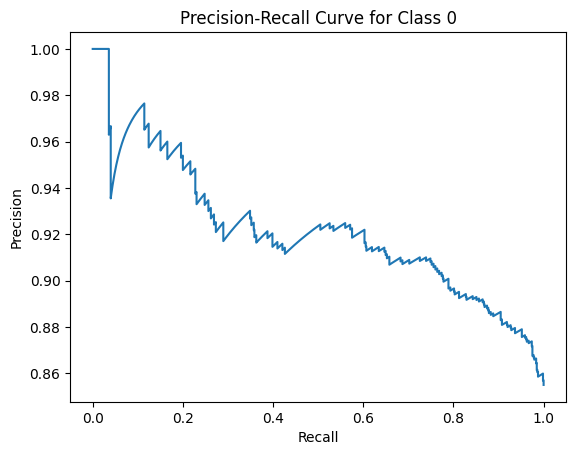

In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingClassifier

# Assuming you have the feature matrix X and the target vector y

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

# Create and fit the model
model = HistGradientBoostingClassifier()
model.fit(X_train, y_train)

# Get the predicted probabilities for the validation set
y_prob = model.predict_proba(X_val)

# Choose the class for which you want to plot the precision-recall curve
class_index = 0

# Extract the probabilities for the chosen class
y_prob_class = y_prob[:, class_index]

# Get the true labels for the chosen class
y_true_class = (y_val == class_index)

# Calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_true_class, y_prob_class)

# Plot the precision-recall curve
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Class {}'.format(class_index))
plt.show()

# Increasing the precision for a choosing class by adjusting the classification threshold
### You can increase precision at the expense of recall by raising the threshold, which will cause the model to predict things more conservatively.

In [9]:
import numpy as np
from sklearn.metrics import precision_score, recall_score


# Get the predicted probabilities for the validation set
y_prob = model.predict_proba(X_val)

# Choose the class for which you want to increase precision
class_index = 0

# Extract the probabilities for the chosen class
y_prob_class = y_prob[:, class_index]

# Set a higher threshold to increase precision
threshold = 0.8

# Generate the predicted labels based on the adjusted threshold
y_pred_adjusted = np.where(y_prob_class >= threshold, class_index, 1)

# Calculate the precision with the adjusted threshold
precision_adjusted = precision_score(y_val, y_pred_adjusted, average='binary')

# Calculate the recall with the adjusted threshold
recall_adjusted = recall_score(y_val, y_pred_adjusted, average='binary')

print("Precision with adjusted threshold:", precision_adjusted)
print("Recall with adjusted threshold:", recall_adjusted)

Precision with adjusted threshold: 0.2804232804232804
Recall with adjusted threshold: 0.43089430894308944


# To evalaute the model on test set and draw conclusions 

In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming you have the test feature matrix X_test and true labels y_test
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)

# Calculate precision, recall, and F1 score for each class
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.9339622641509434
Confusion Matrix:
[[705   1]
 [ 55  87]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       706
           1       0.99      0.61      0.76       142

    accuracy                           0.93       848
   macro avg       0.96      0.81      0.86       848
weighted avg       0.94      0.93      0.93       848



# Conclusion
### In this code,the precision,accuracy,F1 and confusion matrix and a classification report for each of the following,You can evaluate the model's performance, spot any possible problems or opportunities for development, and decide whether the model is appropriate for the task at hand.